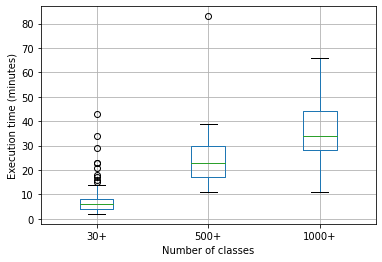

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

def get_df_in_range(df, col, min, max):
    return df[(df[col] > min) & (df[col] <= max)].sort_values(col, ascending=False)

dfbp = pd.DataFrame()
df = pd.read_csv('./time_output_full')

# Remove one huge outlier going for 4000 seconds (ruins the boxplot visualisation)
#df = get_df_in_range(df, 'time', 0, 4000)
df['time'] = divmod(df['time'], 60)[0] # minutes

df1 = get_df_in_range(df, 'classes', 0, 500)
df2 = get_df_in_range(df, 'classes', 500, 1000)
df3 = get_df_in_range(df, 'classes', 1000, 10000)

dfbp = pd.concat([dfbp, df1['time'], df2['time'], df3['time']], ignore_index=True, axis=1)
dfbp.columns = ['30+', '500+', '1000+']
bp = dfbp.boxplot()
bp.set_xlabel('Number of classes')
bp.set_ylabel('Execution time (minutes)')
plt.savefig('./time_analysis.png')
